In [58]:
# Import the required Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

In [2]:
# Loading the Dataset

df = pd.read_csv("train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Removing Unwanted column

df.drop(['Item_Identifier'],axis=1,inplace=True)

## Basic EDA

In [4]:
# Shape of the dataset

df.shape

(8523, 11)

In [5]:
# Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [6]:
# Describe the Numerical data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [7]:
# Describe the Categorical data

df.describe(include='O').T

,count,unique,top,freq
Item_Fat_Content,8523,5,Low Fat,5089
Item_Type,8523,16,Fruits and Vegetables,1232
Outlet_Identifier,8523,10,OUT027,935
Outlet_Size,6113,3,Medium,2793
Outlet_Location_Type,8523,3,Tier 3,3350
Outlet_Type,8523,4,Supermarket Type1,5577


In [8]:
# Identify the Missing Values

df.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# Checking for duplicate values

df.duplicated().sum()

0

In [10]:
# Finding columns with numerical data

numericalColumns = df.select_dtypes(include=np.number).columns
numericalColumns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
# Finding columns with objective data

objectColumns = df.select_dtypes(include=object).columns
objectColumns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [12]:
# Finding discrete columns and continuous columns from numerical columns

discreteCols=[]
continuousCols=[]

for column in numericalColumns:
    if df[column].nunique()>20:
        continuousCols.append(column)
    else:
        discreteCols.append(column)


In [13]:
continuousCols

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

In [14]:
# Removing the Dependent Feature from ContinuousCols

continuousCols.remove('Item_Outlet_Sales')

In [15]:
discreteCols

['Outlet_Establishment_Year']

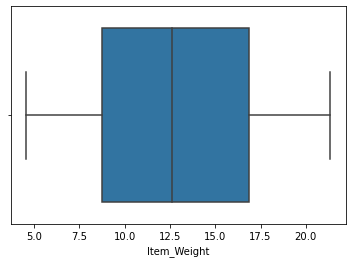

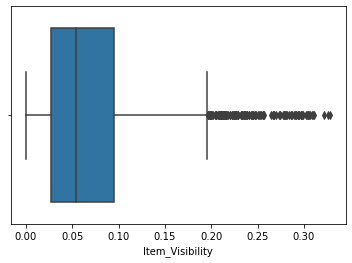

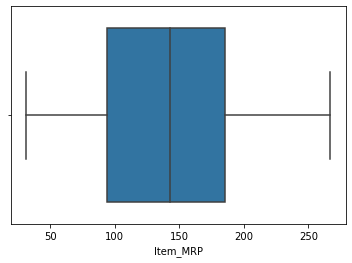

In [16]:
# Checking for Outlier values by plotting

for column in continuousCols:
    sns.boxplot(column,data=df)
    plt.show()

## Missing Value Treatment

In [17]:
# Mean Imputation

df['Item_Weight'].fillna(df["Item_Weight"].mean(),inplace=True)

In [18]:
# Random Sample Imputation

random_sample=df['Outlet_Size'].dropna().sample(df['Outlet_Size'].isna().sum(),random_state=1)
random_sample.index=df[df['Outlet_Size'].isnull()].index
df.loc[df['Outlet_Size'].isna(),'Outlet_Size']=random_sample

In [19]:
# Mean imputation in the place of Zero values

print('Total Zero vales in Item_visibility:', df[df['Item_Visibility']==0].shape[0])
df['Item_Visibility'].loc[df['Item_Visibility']==0] = df['Item_Visibility'].mean()

Total Zero vales in Item_visibility: 526


C:\Users\LAP\AppData\Local\Temp\ipykernel_10448\1802202609.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Visibility'].loc[df['Item_Visibility']==0] = df['Item_Visibility'].mean()


## Outlier Treatment

In [20]:
# Handling Outlier from Item_Visibility

upper_lim=df['Item_Visibility'].mean() + df['Item_Visibility'].std() *3
lower_lim=df['Item_Visibility'].mean() - df['Item_Visibility'].std() *3

df.loc[(df['Item_Visibility'] > upper_lim),'Item_Visibility'] = upper_lim
df.loc[(df['Item_Visibility'] < lower_lim),'Item_Visibility'] = lower_lim


## Categorical Encoding

In [21]:
objectColumns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [22]:
df.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [23]:
df['Outlet_Identifier'].str.split("0").str[1]

0       49
1       18
2       49
3        1
4       13
        ..
8518    13
8519    45
8520    35
8521    18
8522    46
Name: Outlet_Identifier, Length: 8523, dtype: object

In [24]:
# Using Label Encoding

label_Item_Type = LabelEncoder()
df['Item_Type'] = label_Item_Type.fit_transform(df['Item_Type'])

In [25]:
# Using Mapping Technique

Item_Fat = {'Low Fat':1,'LF':1,'low fat':1,'Regular':2,'reg':2}
Outlet_Size = {'High':1,'Medium':2,'Small':3}
Outlet_Type = {'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3,'Grocery Store':4}

df['Item_Fat_Content'] = df['Item_Fat_Content'].map(Item_Fat)
df['Outlet_Size'] = df['Outlet_Size'].map(Outlet_Size)
df['Outlet_Type'] = df['Outlet_Type'].map(Outlet_Type)


In [26]:
# Using Split function in python

df["Outlet_Location_Type"] = df["Outlet_Location_Type"].str.split(" ").str[1]
df["Outlet_Location_Type"] = df["Outlet_Location_Type"].astype(int)
df["Outlet_Identifier"] = df["Outlet_Identifier"].str.split("0").str[1]
df["Outlet_Identifier"] = df["Outlet_Identifier"].astype(int)

## Normalization & Standardization

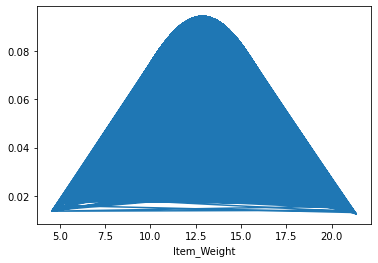

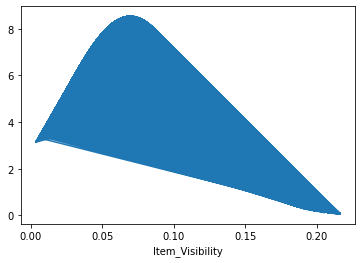

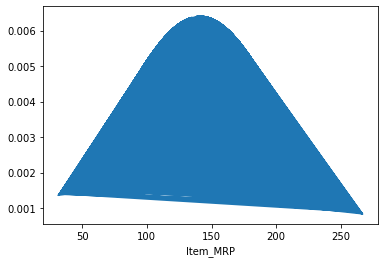

In [27]:
# Plotting th Continous columns in Normal Distribution

for column in continuousCols:
    mean = np.mean(df[column])
    std = np.std(df[column])
    plt.plot(df[column], norm.pdf(df[column],mean,std))
    plt.xlabel(column)
    plt.show()

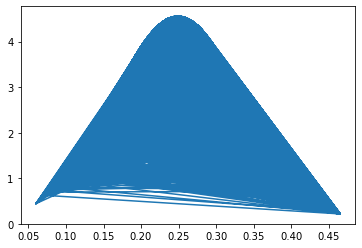

In [45]:
# Making 'Item_Visibilty' feature to Noramly Distributed data using Square root Transformtion

df['Item_Visibility'] = df['Item_Visibility']**(1/2)
mean = np.mean(df['Item_Visibility'])
std = np.std(df['Item_Visibility'])
plt.plot(df['Item_Visibility'], norm.pdf(df['Item_Visibility'],mean,std))
plt.show()

## Train Test Split

In [49]:
X = df.drop('Item_Outlet_Sales',axis=1)
y = df['Item_Outlet_Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

## Scale Down

In [50]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

## Apply All Regression Algorithms

In [ ]:
# Voting Regressor

lr_re = LinearRegression()
dt_re = DecisionTreeRegressor()
rf_re = RandomForestRegressor()
ad_re = AdaBoostRegressor()
gd_re = GradientBoostingRegressor()
svr_re = SVR()
knn_re = KNeighborsRegressor()

voting = VotingRegressor(estimators=[('Linear_Regression',lr_re),('Decision_Tree_Regressor',dt_re),('Random_Forest_Regressor',rf_re),('AdaBoost_Regressor',ad_re),
                            ('Gradient_Boosting_Regressor',gd_re),('SVR_Regressor',svr_re),('KNeighbors_Regressor',knn_re)])